In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-crime-data/Delhi Accident Data.csv


# Dataset detais 
* YEAR- it is showing the year when data was recorded
* DISTRICT- Districts of Delhi
* VEHICLE AT FAULT- 
* VICTIM- Those whe were hit
* TYPE OF ACCIDENT- Accident is fata or not
* No OF INJURED- Number of injuries during the accident
* NO OF KILLED- Number of persons were killed after the accidents 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px


In [3]:
plt.style.use('seaborn-darkgrid')

orange_black = ['#fdc029', '#df861d', 'FF6347', '#aa3d01',
                '#a30e15', '#800000', '#171820']

plt.rcParams['figure.figsize'] = (10,5) 
plt.rcParams['figure.facecolor'] = '#FFFACD' 
plt.rcParams['axes.facecolor'] = 'FFFFE0' 
plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = orange_black[3]
plt.rcParams['grid.linestyle'] = '--' 

In [4]:
df=pd.read_csv('../input/delhi-crime-data/Delhi Accident Data.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,# INJURED,# KILLED,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1,NaN,NaN,NaN
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1,NaN,NaN,NaN
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0,NaN,NaN,NaN


In [5]:
df=df.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9"], axis=1)

In [6]:
df.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,# INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75748 entries, 0 to 75747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              75748 non-null  int64 
 1   DISTRICT          75748 non-null  object
 2   VEHICLE AT FAULT  75748 non-null  object
 3   VICTIM            75748 non-null  object
 4   TYPE OF ACCIDENT  75748 non-null  object
 5   # INJURED         75748 non-null  int64 
 6   # KILLED          75748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


# Checking the missing values 

In [8]:
df.isnull().sum()

YEAR                0
DISTRICT            0
VEHICLE AT FAULT    0
VICTIM              0
TYPE OF ACCIDENT    0
# INJURED           0
# KILLED            0
dtype: int64

# Cointing the districs of Delhi

In [9]:
df['DISTRICT'].value_counts()

SOUTH EAST DELHI       10096
NEW DELHI               9529
NORTH DELHI(ROHINI)     8903
CENTRAL DELHI           8119
SOUTH WEST DELHI        7462
WEST DELHI              7289
NORTH WEST DELHI        7013
EAST DELHI              5599
SHAHDARA                4850
SOUTH DELHI             3716
NORTH EAST DELHI        3153
UNK                       18
OUTER                      1
Name: DISTRICT, dtype: int64

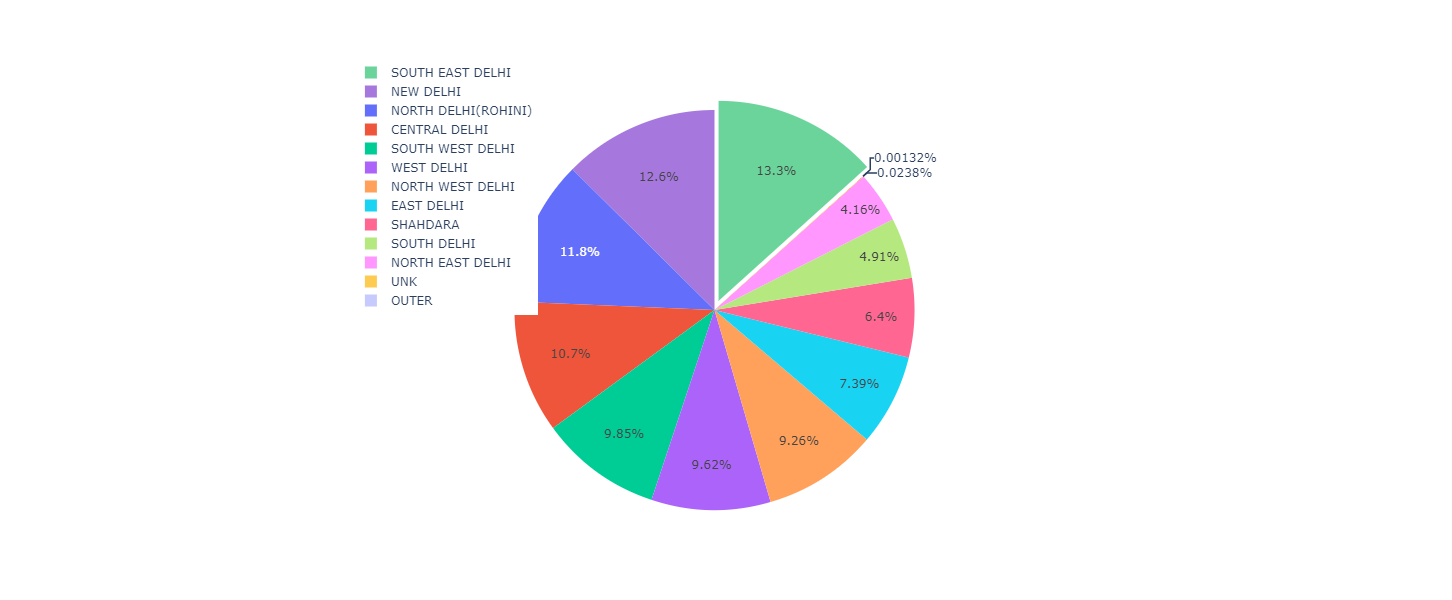

In [10]:
col = "DISTRICT"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

**Inference**
* First observation is that the accident occuring through out the state has not much variation. 
* As we can see that SOUTH EAST DELHI districs is more prone to road accident as % of accident is highest in this districs (13.3%)
* 2nd is NEW DELHI with 12.6 % of tota accident (9526).
* 3rd is NORTH DELHI (ROHINI) 
* Since last 4 state EAST DEHI (7.39%), SHAHDARA(6.4%), SOUTH DELHI(4.91%), NORTH EAST DELHI(4.16%). These districts expreience the less number of accidents compared to the rest of the districs

In [11]:
df.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,# INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


# VICTIM counts and their types

In [12]:
df['VICTIM'].value_counts()

PEDESTRIAN        31872
S/C & M/C         26280
CAR                4238
CYCLE              3349
SELF               2918
TSR                2026
CYCLE RICKSHAW     1404
PASSANGER           927
TEMPO               480
DELIVERY VAN        420
HTV                 290
TAXI                264
TNG                 201
ERC                 167
DTC                 132
POLICE VEHICLE      103
HDC                  98
GMS                  78
TMP                  74
BUS                  63
TRC                  62
MINI BUS/RTV         48
TCN                  39
TNK                  29
AMBULANCE            24
TAX                  23
BLB                  19
BUL                  16
OSB                  15
CRN                  13
MAT                  12
ANI                  11
CBS                  10
MBS                   9
POV                   9
MIL                   7
SBS                   7
EBK                   5
CAB                   4
STR                   1
ELT                   1
Name: VICTIM, dt

In [13]:
cnt=0
for i in df['VICTIM'].value_counts():
    if i <100:
        cnt=cnt+1
        
print(cnt)
        

25


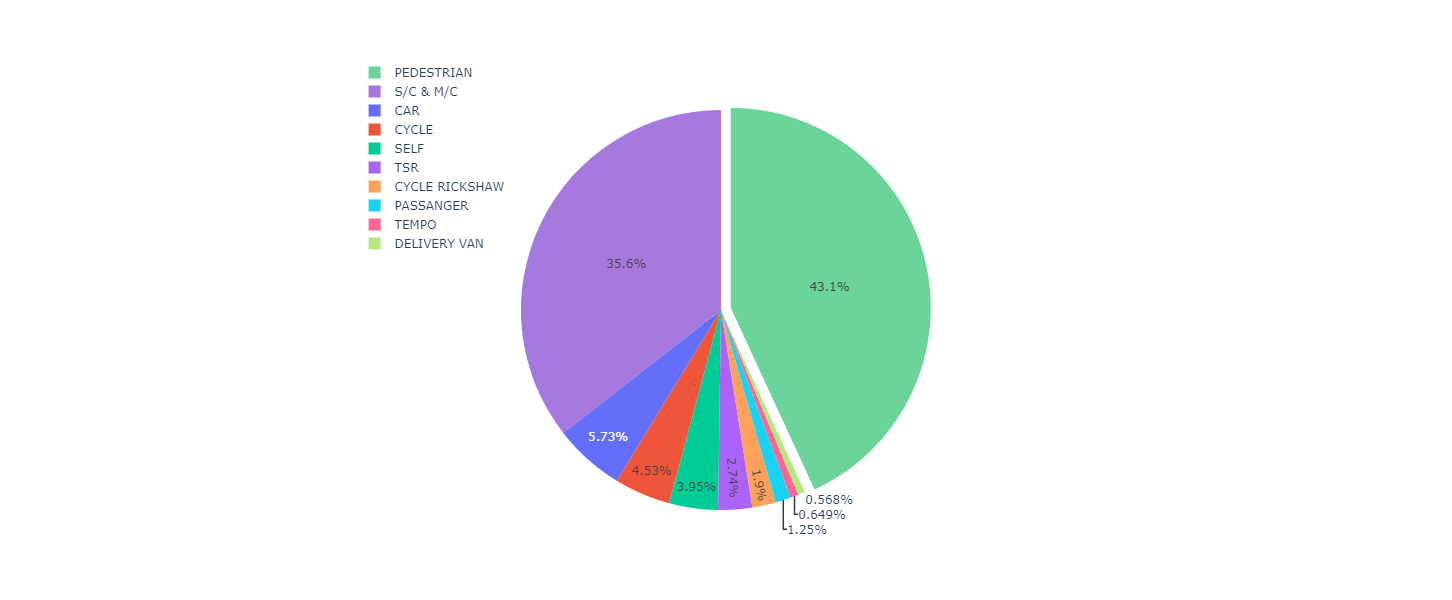

<Figure size 720x720 with 0 Axes>

In [14]:
col = "VICTIM"
grouped = df[col].value_counts().sort_values(ascending=False).head(10).reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
plt.figure(figsize=(10,10))

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

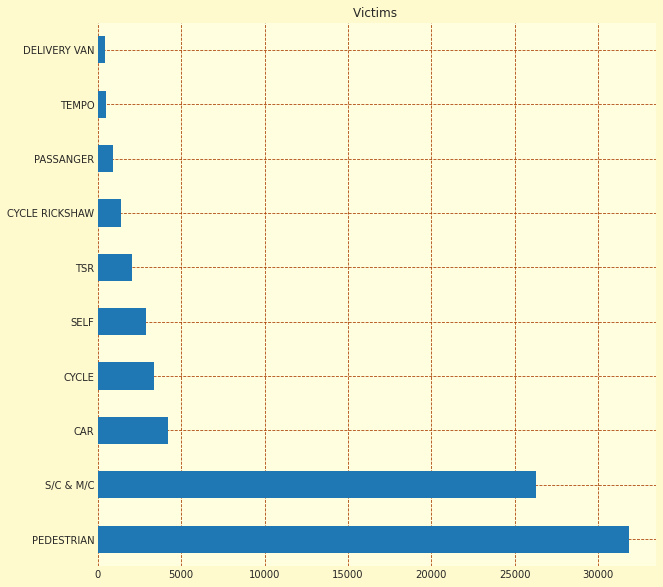

In [15]:
df['VICTIM'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,10))
plt.grid(b=True)
plt.title("Victims ")
plt.show()

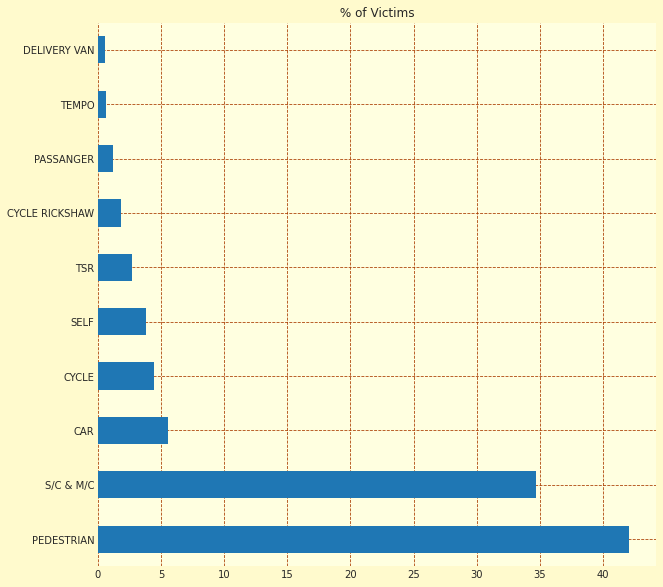

In [16]:
(df['VICTIM'].value_counts().sort_values(ascending=False)/len(df)*100).head(10).plot(kind='barh', figsize=(10,10))
plt.grid(b=True)
plt.title(" % of Victims ")
plt.show()

**Inference**
* From the above figure it can be seen that top 10 victims in road accidents. 
* As it can be seen that number of accidents are much higher in DELHI.
* The most affected by the accidents are pedestrain , since those who are using pedetrain . were hit mostly 42.1% of the tota victims.
* The second most affected due to accidents are S/C & M/C those are 34.7% of al the victims. 
* 3rd one is those people who have cars. Their percentage is 5.59 %.


# Changing the name of the columns 

In [17]:
df=df.rename(columns={"# INJURED":"No of INJURED"})

In [18]:
df.columns

Index(['YEAR', 'DISTRICT', 'VEHICLE AT FAULT', 'VICTIM', 'TYPE OF ACCIDENT',
       'No of INJURED', '# KILLED '],
      dtype='object')

# Sunbrust chart using plotly

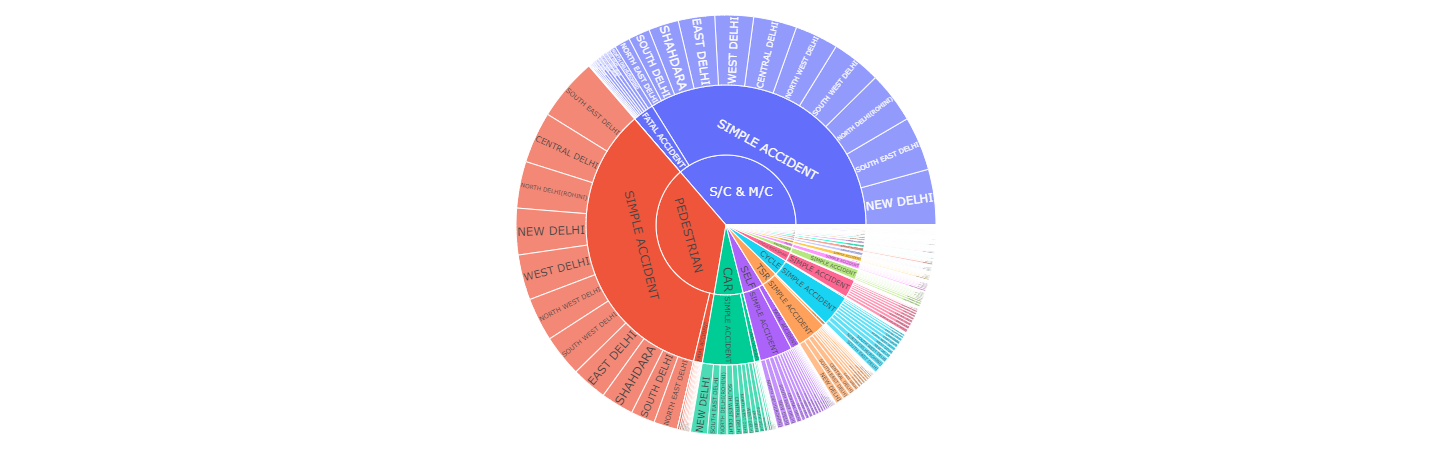

In [19]:
fig=px.sunburst(df, path=['VICTIM', 'TYPE OF ACCIDENT' , "DISTRICT"], values="No of INJURED",
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=15, l=15, r=15, b=15))
fig.show()

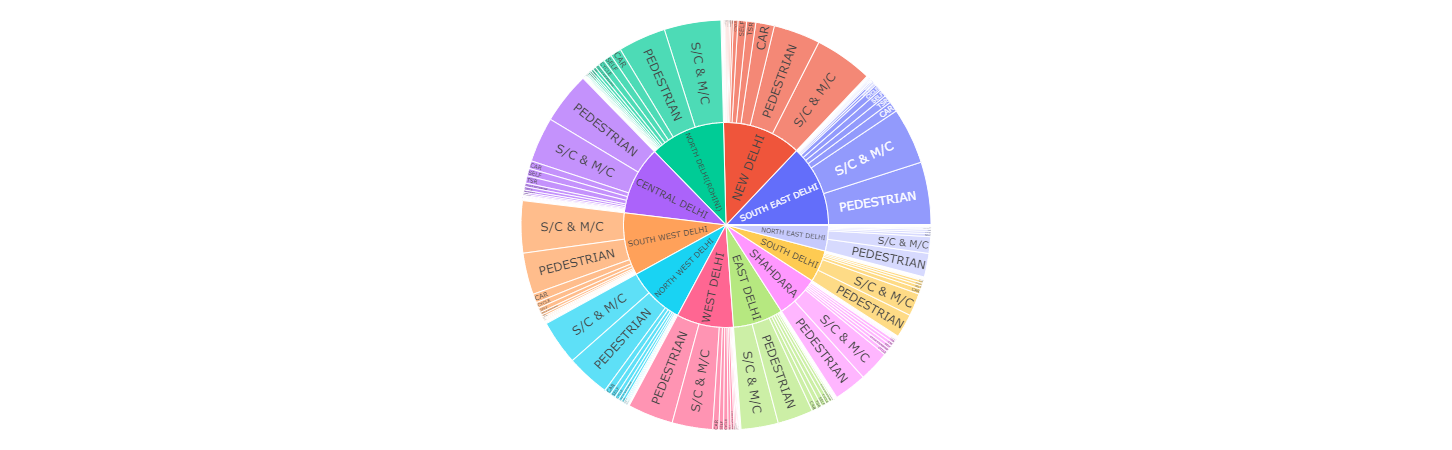

In [39]:
fig=px.sunburst(df, path=["DISTRICT",'VICTIM',  ], values="No of INJURED",
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=20, l=20, r=20, b=20))
fig.show()

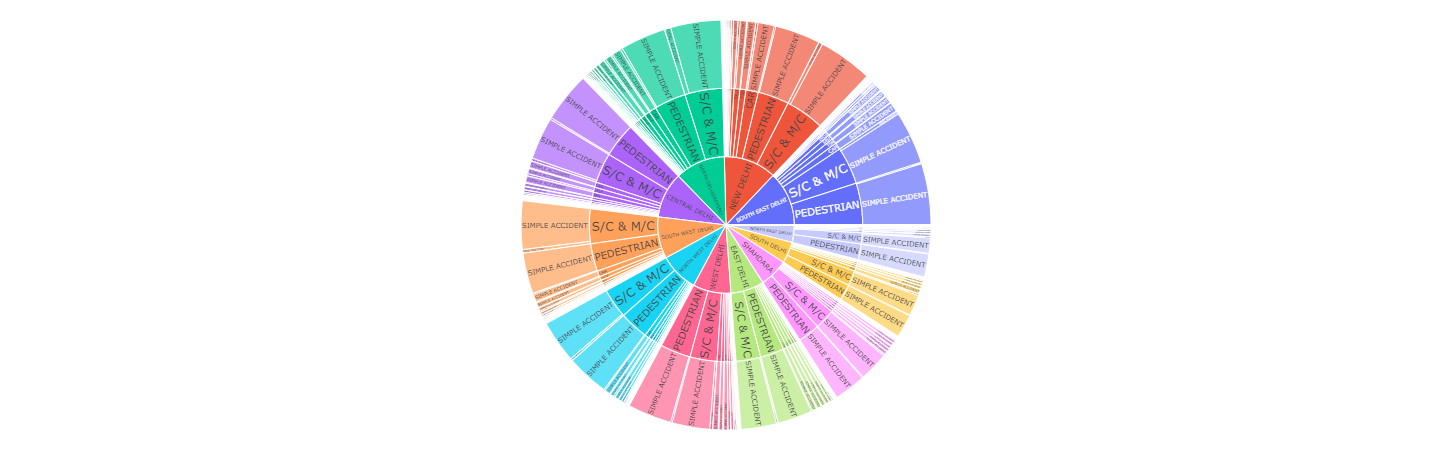

In [40]:
fig=px.sunburst(df, path=["DISTRICT",'VICTIM', 'TYPE OF ACCIDENT' ], values="No of INJURED",
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=20, l=20, r=20, b=20))
fig.show()

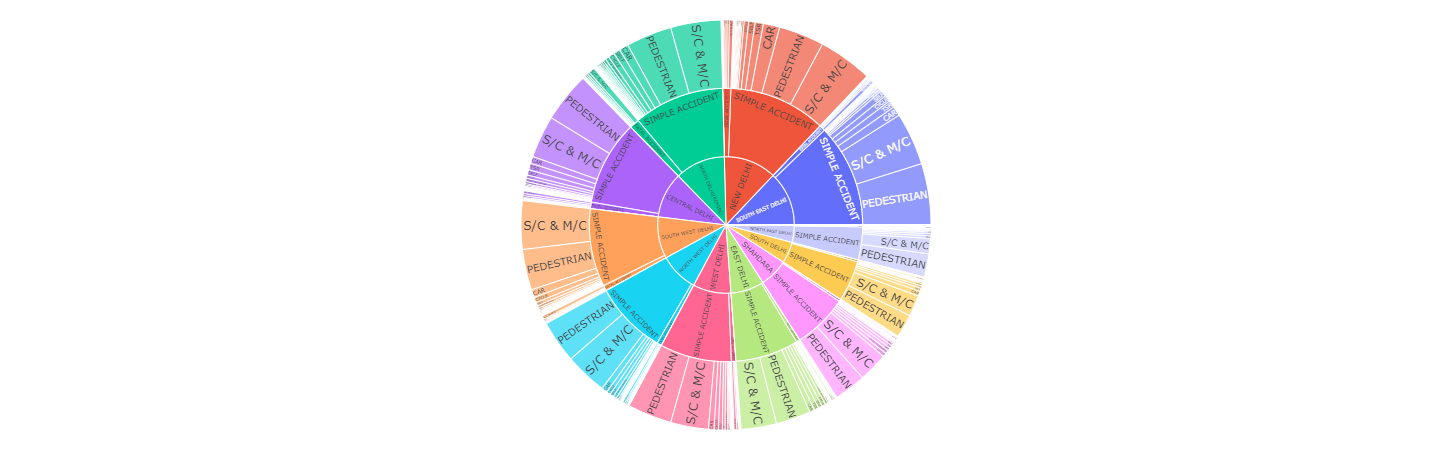

In [41]:
fig=px.sunburst(df, path=["DISTRICT", 'TYPE OF ACCIDENT','VICTIM' ], values="No of INJURED",
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=20, l=20, r=20, b=20))
fig.show()

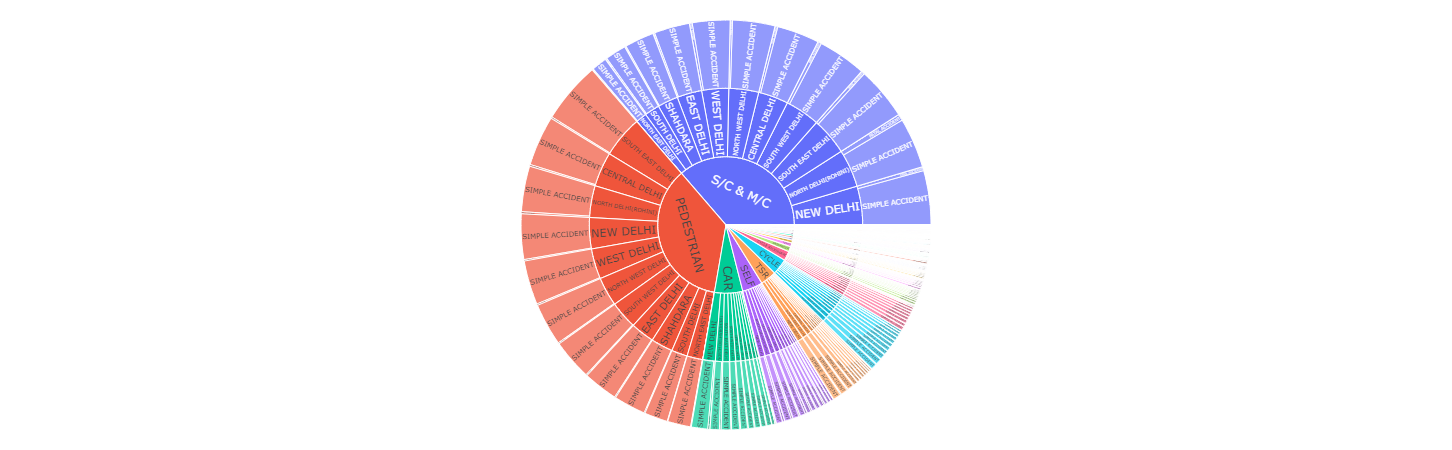

In [42]:
fig=px.sunburst(df, path=['VICTIM',"DISTRICT", 'TYPE OF ACCIDENT' ], values="No of INJURED",
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=20, l=20, r=20, b=20))
fig.show()

In [20]:
df.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,No of INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


# Vehicle at fault 

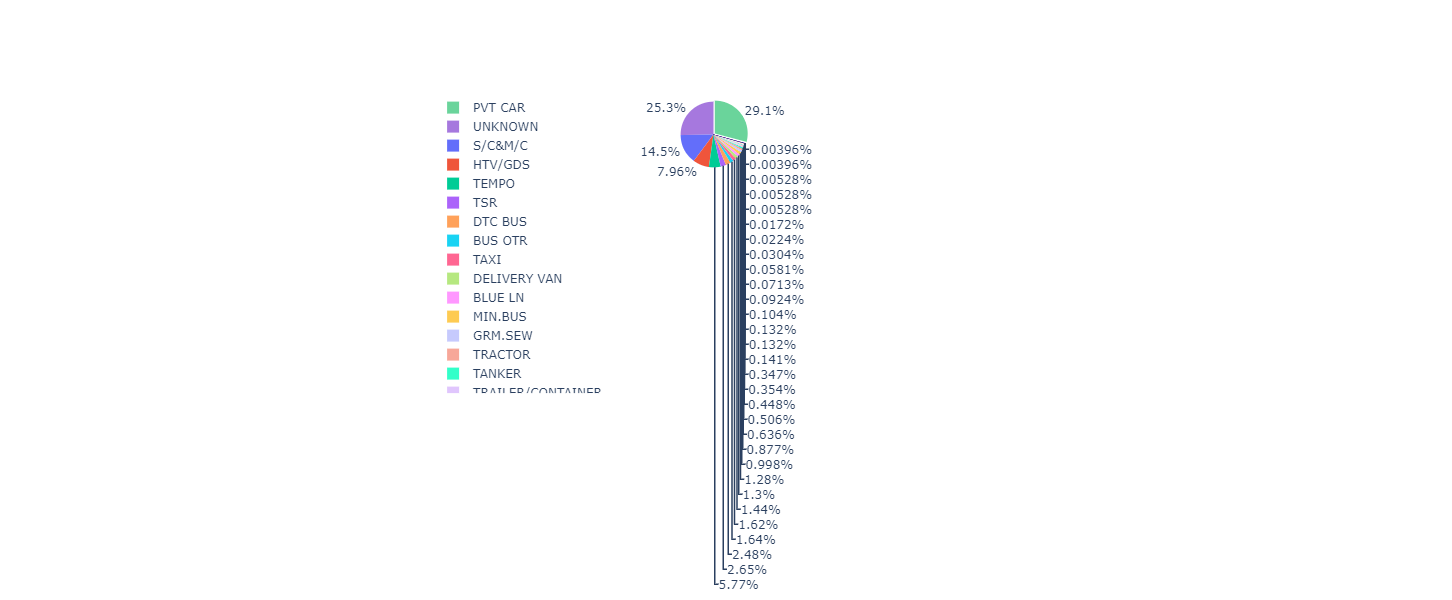

In [43]:
col = "VEHICLE AT FAULT"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [44]:
df['VEHICLE AT FAULT'].value_counts()

PVT CAR              22043
UNKNOWN              19145
S/C&M/C              10990
HTV/GDS               6029
TEMPO                 4369
TSR                   2006
DTC BUS               1879
BUS OTR               1241
TAXI                  1226
DELIVERY VAN          1090
BLUE LN                981
MIN.BUS                969
GRM.SEW                756
TRACTOR                664
TANKER                 482
TRAILER/CONTAINER      383
BUS O S                339
CTR BUS                268
CRANE                  263
DELIVRY                107
ERCAW                  100
BUS SCL                100
CAL CAB                 79
TRL/CON                 70
MILITRY                 54
AMBULNC                 44
POL.VEH                 23
C.RICKW                 17
STEEM R                 13
MATADOR                  4
TONGA/R                  4
B.CARTS                  4
CYCLELIST                3
HANDCRT                  3
Name: VEHICLE AT FAULT, dtype: int64

# Visualizing only top 10 

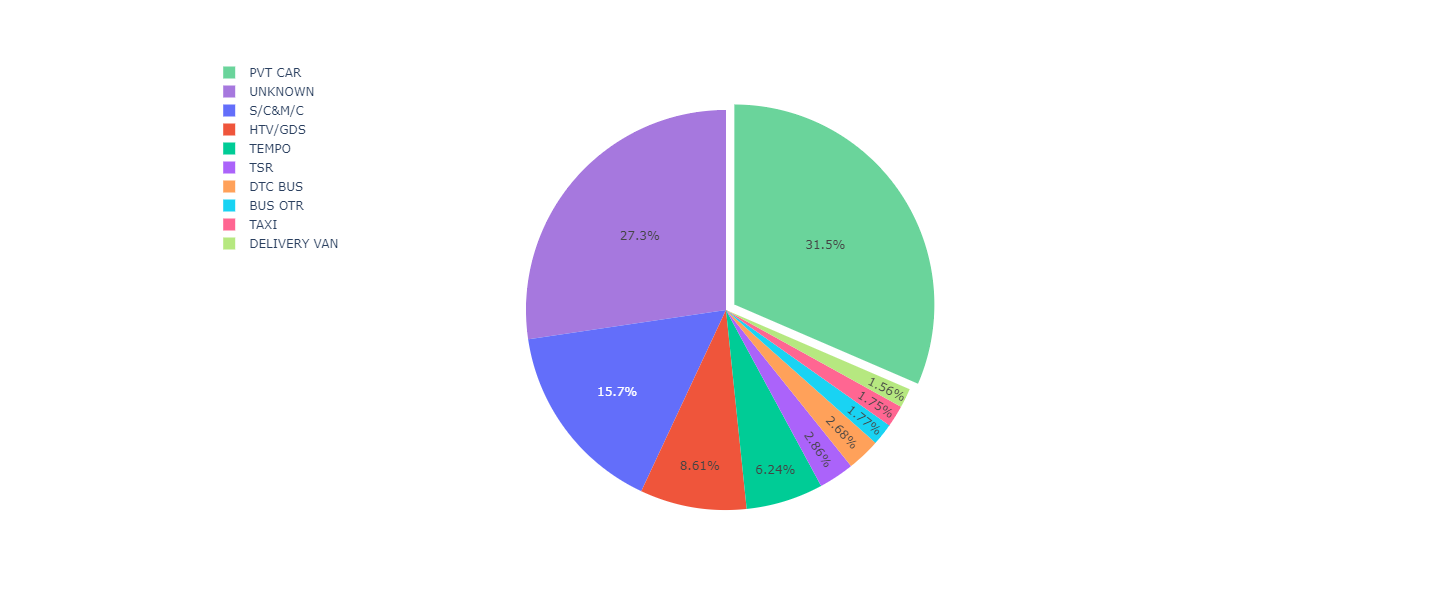

In [46]:
col = "VEHICLE AT FAULT"
grouped = df[col].value_counts().sort_values(ascending=False).head(10).reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

# TYPE OF ACCIDENT counts and their contribution

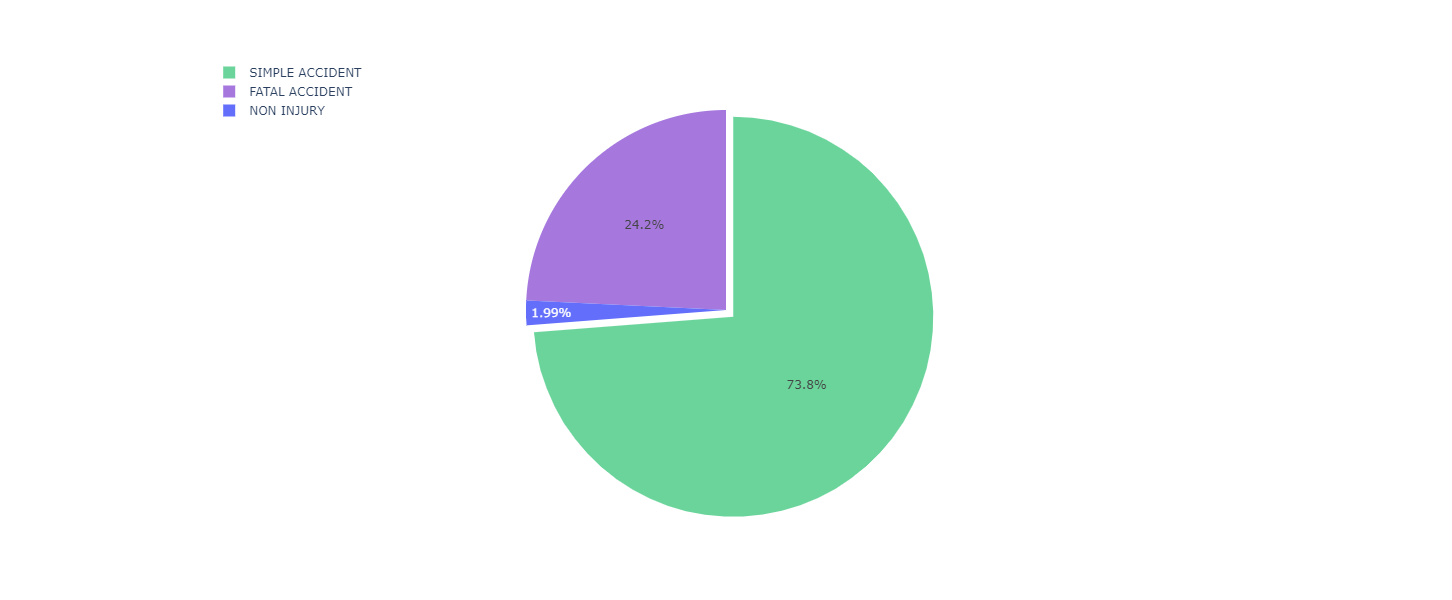

In [21]:
col = "TYPE OF ACCIDENT"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

**Inference**
* We can see that Maximum accident that ouurs on DElHI's road is SIMPPLE ACCIDENT which is 73.8 % (55,883).Here we can conclude that 74 accident out of 100 are simple and fear of lossing lives after the accident is less.
* While the %age of FATAL ACCIDENT is 24.4%(18,361) of total accident. It can be concluded that almost 24 people out of every 100 accidents  experience severe injuries which may incude death and life long disabiities. Since the actual number of fatal accident is quite high. 
* Third one is NON_INJURY which is amost 2% of tota accident. AS it can be said only 2 out of every 100, which is very less.
* Since avoiding 100% accident on the road is not possibe but in case the fatal accident can decrease , the overall casualties can be reduced

# Conditional distribution of TYPE OF ACCIDENT and DISTRICT

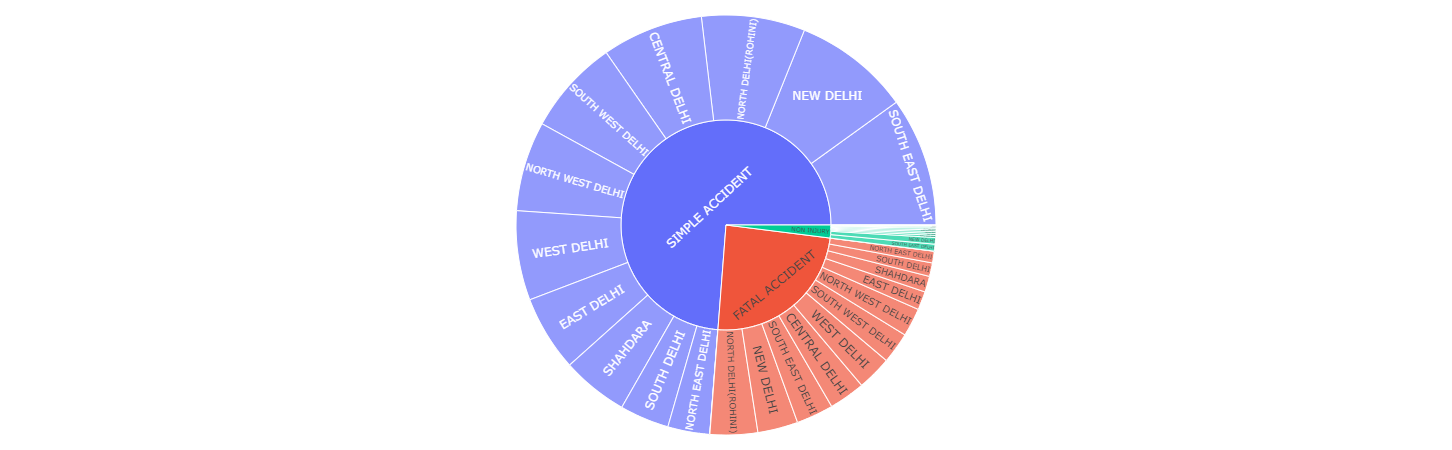

In [22]:
fig=px.sunburst(df, path=[ 'TYPE OF ACCIDENT' , "DISTRICT"],
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=15, l=15, r=15, b=15))
fig.show()

**Inference**
* It can beseen that SIMPLE ACCIDENT had occured at more number of times. 
*> SIMPLE ACCIDENT when compared with the different DISTRICT of DELHI , it is observed that SOUTH EAST DELHI observed maximum number of SIMPE ACCIDENT (7532), Next is NEW DELHI (6793), and 3rd one is NORTH DELHI(ROHINI) (6032). Like wise we can see CENTRAL DELhI,SOUTH WEST DELHI etc.
*> FATAL ACCIDENT compared with DIFFERENT DISTRICT-  IT is seen that the more number of fatal accident is observed at NORTH DELHI(ROHINI) (2770), NEW DELHI(2351), SOUTH EAST DELHI(2166), CENTRA DELHI(2109) , WEST DELHI(2010),etc. These are thr top DISTRICTS which had experienced maximum number of FATAL ACCIDENT. 
*> NON-INJURY compare with DISTRIC-  it can be seen that SOUTH EAST DELHI expreienced maximum NON INJURIES accident (398),NEW DELHI (122) and rest have very few NON-INJURY.   

In [23]:
df.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,No of INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75748 entries, 0 to 75747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              75748 non-null  int64 
 1   DISTRICT          75748 non-null  object
 2   VEHICLE AT FAULT  75748 non-null  object
 3   VICTIM            75748 non-null  object
 4   TYPE OF ACCIDENT  75748 non-null  object
 5   No of INJURED     75748 non-null  int64 
 6   # KILLED          75748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


SInce tge Year column is of integer type, so we have to chnage the year column into the DATETIME type

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75748 entries, 0 to 75747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              75748 non-null  int64 
 1   DISTRICT          75748 non-null  object
 2   VEHICLE AT FAULT  75748 non-null  object
 3   VICTIM            75748 non-null  object
 4   TYPE OF ACCIDENT  75748 non-null  object
 5   No of INJURED     75748 non-null  int64 
 6   # KILLED          75748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


# Setting the Year column as INDEX 

In [26]:
df.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,No of INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75748 entries, 0 to 75747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              75748 non-null  int64 
 1   DISTRICT          75748 non-null  object
 2   VEHICLE AT FAULT  75748 non-null  object
 3   VICTIM            75748 non-null  object
 4   TYPE OF ACCIDENT  75748 non-null  object
 5   No of INJURED     75748 non-null  int64 
 6   # KILLED          75748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


In [28]:
df['YEAR'].value_counts()

2014    8623
2008    8435
2015    8085
2013    7566
2009    7515
2016    7375
2011    7280
2010    7259
2012    6937
2017    6673
Name: YEAR, dtype: int64

<AxesSubplot:>

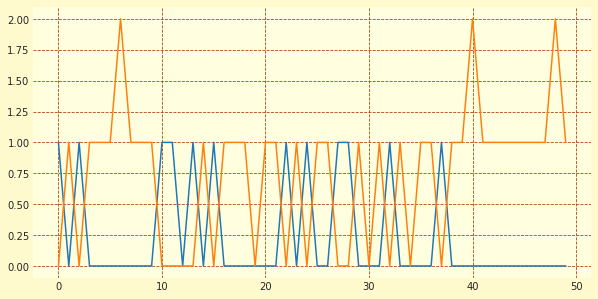

In [29]:
df['# KILLED '].head(50).plot(kind='line')
df['No of INJURED'].head(50).plot(kind='line')

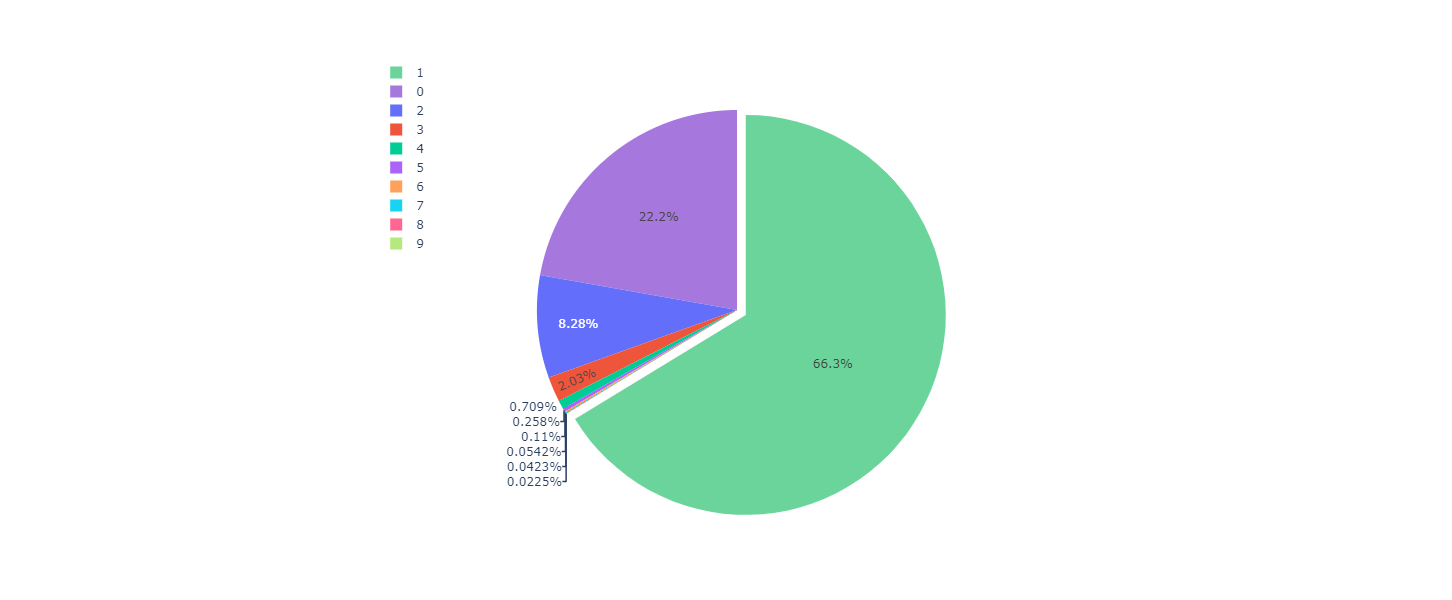

In [30]:
col = "No of INJURED"
grouped = df[col].value_counts().sort_values(ascending=False).head(10).reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

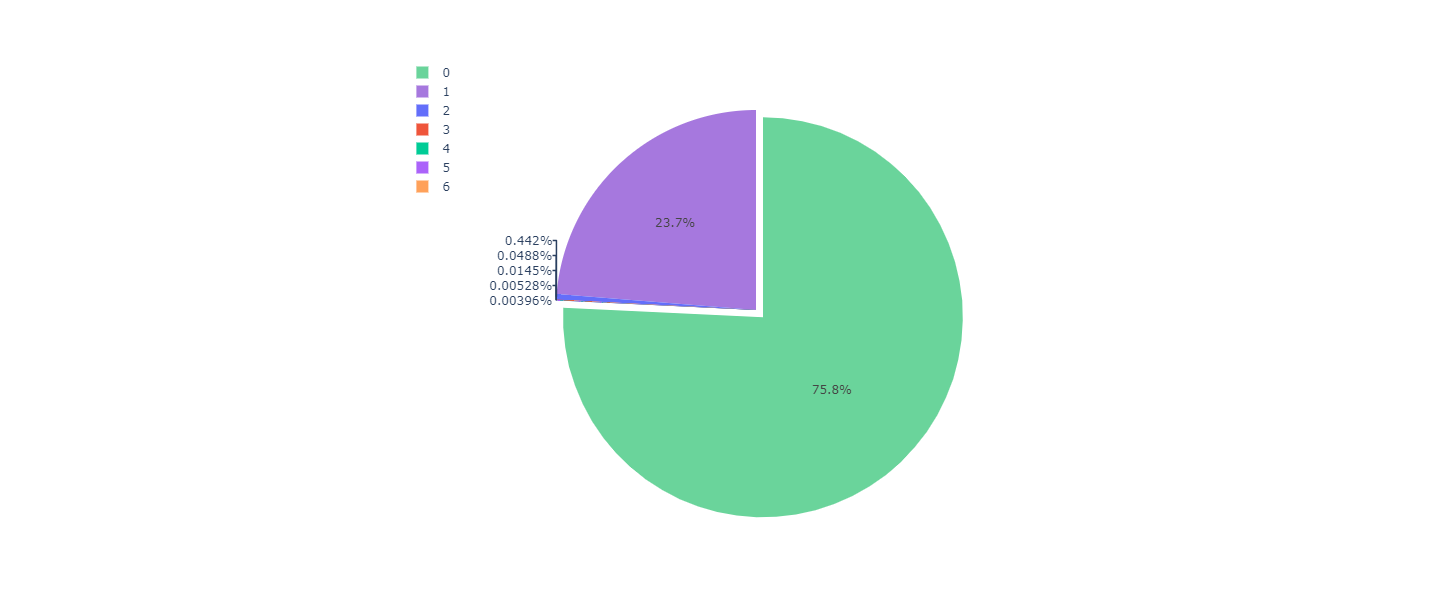

In [31]:
col = "# KILLED "
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

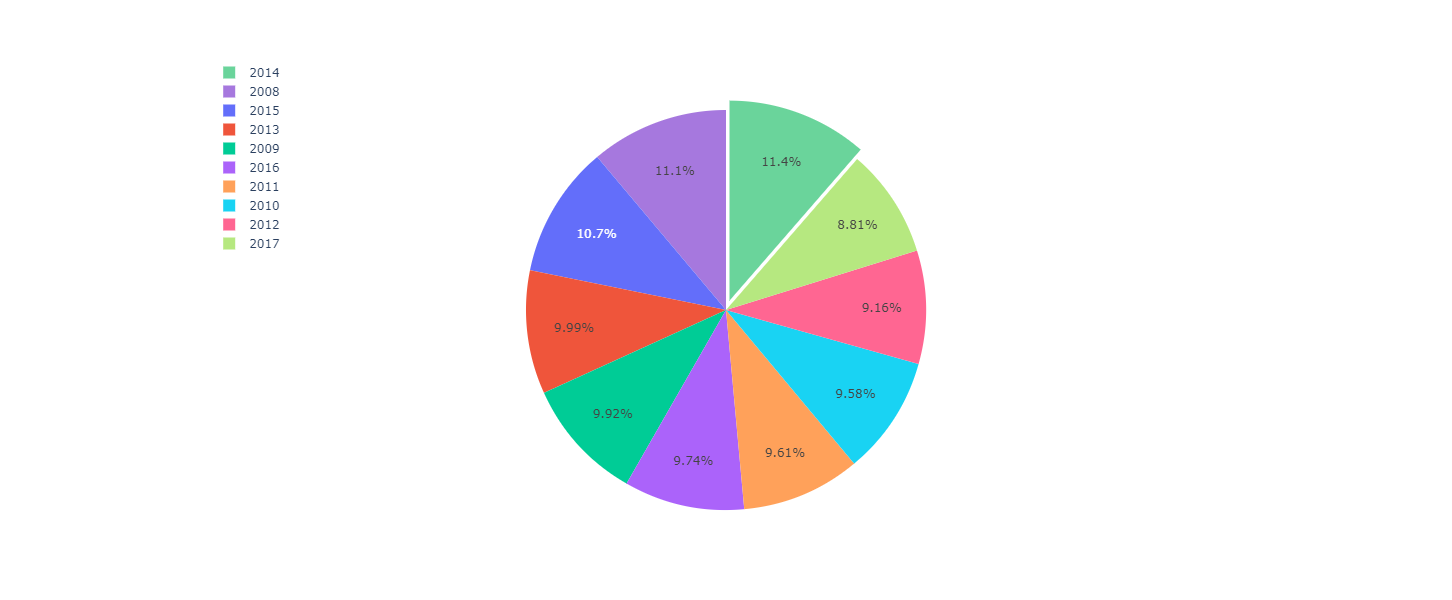

In [32]:
col = "YEAR"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [33]:
df.columns

Index(['YEAR', 'DISTRICT', 'VEHICLE AT FAULT', 'VICTIM', 'TYPE OF ACCIDENT',
       'No of INJURED', '# KILLED '],
      dtype='object')

# Type of accidenf and Victims

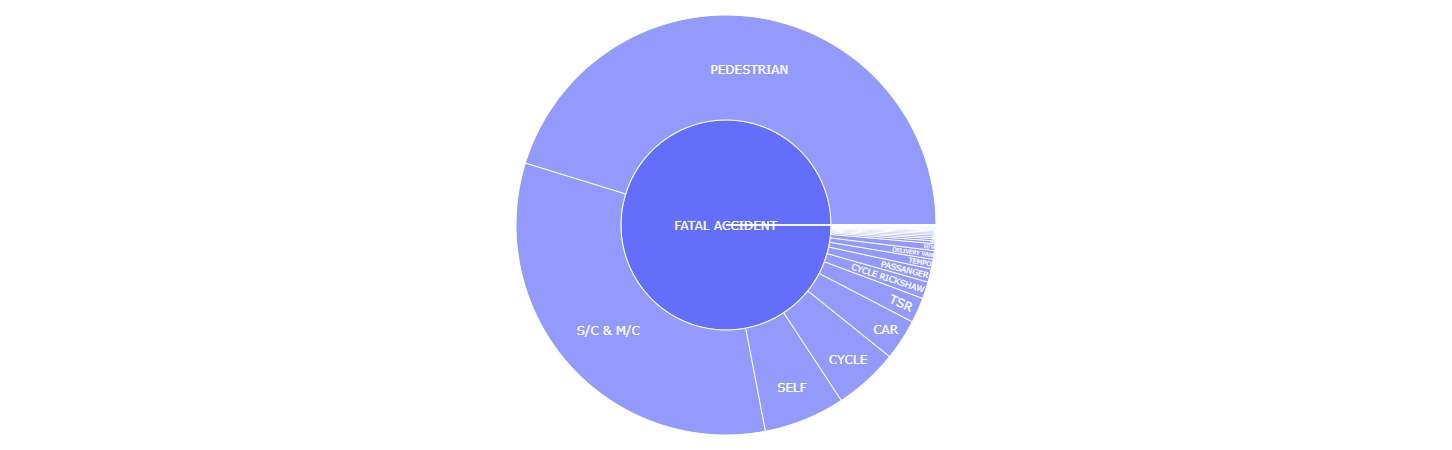

In [34]:
fig=px.sunburst(df, path=[ 'TYPE OF ACCIDENT', 'VICTIM'],values='# KILLED ',
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=15, l=15, r=15, b=15))
fig.show()

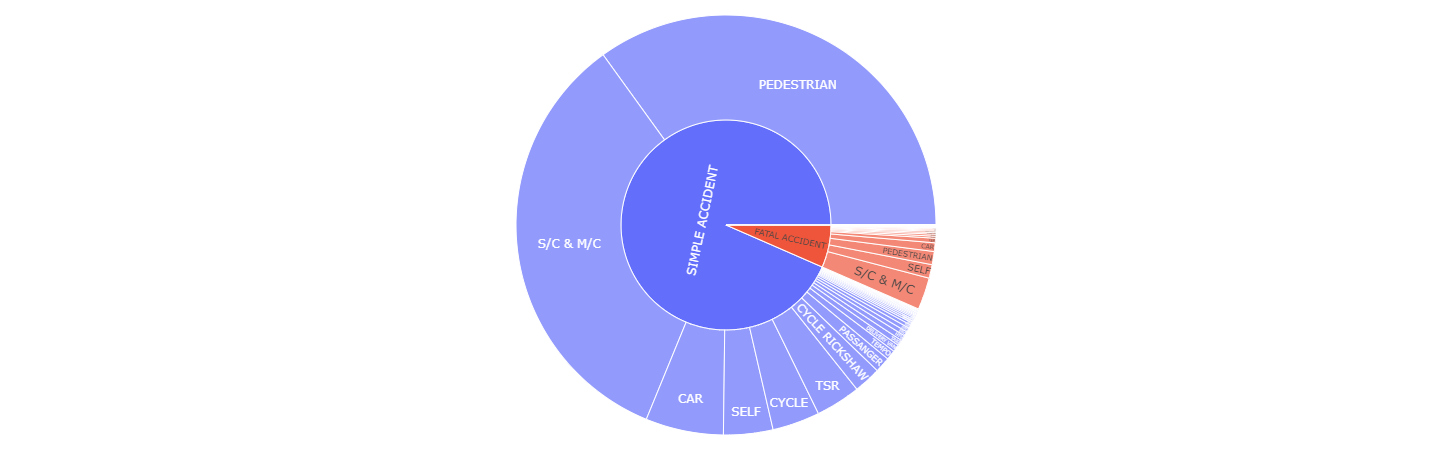

In [35]:
fig=px.sunburst(df, path=[ 'TYPE OF ACCIDENT', 'VICTIM'],values='No of INJURED', 
                color_discrete_map={'(?)':'black', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(
    margin = dict(t=15, l=15, r=15, b=15))
fig.show()

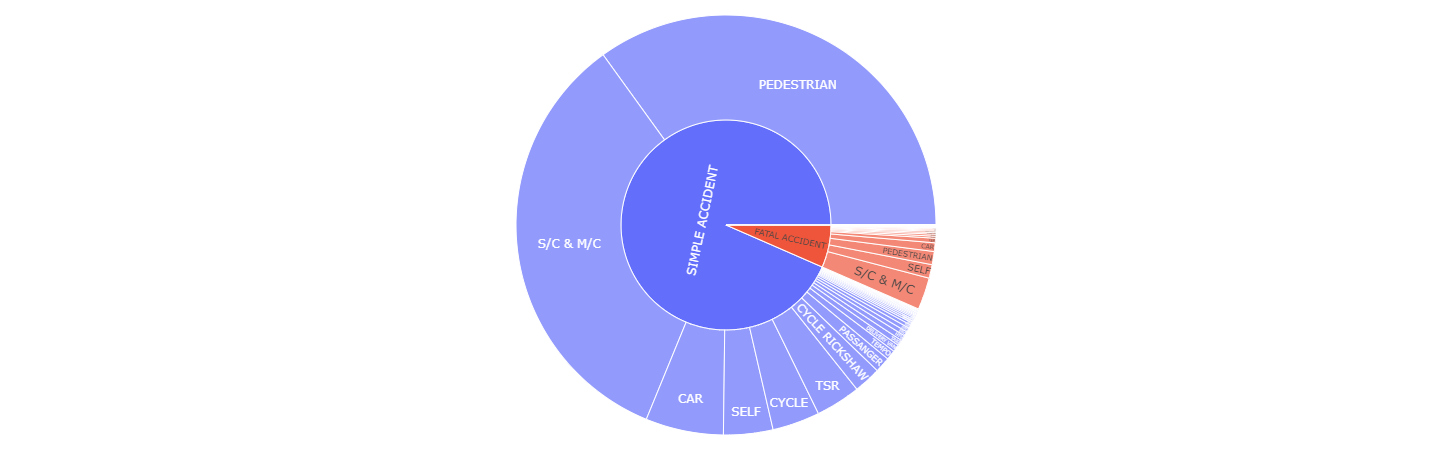

In [36]:
fig=px.sunburst(df, path=[ 'TYPE OF ACCIDENT', 'VICTIM'],values='No of INJURED', 
               color_continuous_midpoint=np.average(df['No of INJURED'], weights=df['# KILLED ']))
fig.update_layout(
    margin = dict(t=15, l=15, r=15, b=15))
fig.show()

# Trend Analysis

In [47]:
dff=df

In [48]:
dff.head()

,YEAR,DISTRICT,VEHICLE AT FAULT,VICTIM,TYPE OF ACCIDENT,No of INJURED,# KILLED
0,2008,NORTH WEST DELHI,UNKNOWN,CAR,FATAL ACCIDENT,0,1
1,2008,NORTH WEST DELHI,UNKNOWN,CYCLE,SIMPLE ACCIDENT,1,0
2,2008,NEW DELHI,HTV/GDS,PEDESTRIAN,FATAL ACCIDENT,0,1
3,2008,EAST DELHI,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0
4,2008,SHAHDARA,S/C&M/C,PEDESTRIAN,SIMPLE ACCIDENT,1,0


In [49]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75748 entries, 0 to 75747
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              75748 non-null  int64 
 1   DISTRICT          75748 non-null  object
 2   VEHICLE AT FAULT  75748 non-null  object
 3   VICTIM            75748 non-null  object
 4   TYPE OF ACCIDENT  75748 non-null  object
 5   No of INJURED     75748 non-null  int64 
 6   # KILLED          75748 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
dff['date_added']=pd.to_datetime(dff['date_added'])
